In [ ]:
import pandas as pd
import pandas_datareader.wb as wb

# 분야별 지표 사전 정의
sector_indicators = {
    # 교통
    'IS.RRS.TOTL.KM': 'Railway_Total_km',
    'IS.ROD.DNST.KM': 'Road_Density',
    
    # 환경
    'EN.ATM.CO2E.KT': 'CO2_Emissions',
    
    # 전력
    'EG.ELC.ACCS.ZS': 'Electricity_Access',
    
    # 도시개발
    'SP.URB.TOTL.IN.ZS': 'Urban_Population_Pct'
}

# 데이터 요청
df = wb.download(
    indicator=list(sector_indicators.keys()),
    country=['Iraq'],  # 국가 필터
    start=2003,
    end=2011
).reset_index()

# 컬럼명 변경
df = df.rename(columns=sector_indicators)
print(df.head())


In [ ]:
from itertools import islice

def chunked_indicators(size=3):
    it = iter(sector_indicators.items())
    for i in range(0, len(sector_indicators), size):
        yield {k:v for k,v in islice(it, size)}

for chunk in chunked_indicators():
    temp_df = wb.download(
        indicator=list(chunk.keys()),
        country=['Iraq'],
        start=2020,
        end=2023
    )
    # 데이터 처리 로직


In [ ]:
# 필수 라이브러리 설치
!pip install wbdata pandas matplotlib seaborn

In [ ]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 수집 설정
indicators = {
    'NY.GDP.MKTP.KD.ZG': 'GDP 성장률',  # GDP 성장률(연간 %)
    'FP.CPI.TOTL.ZG': '인플레이션',     # 소비자물가상승률
    'SL.UEM.TOTL.ZS': '실업률',        # 실업률(%)
    'NE.EXP.GNFS.ZS': '수출의 GDP 대비 비율'
}

countries = ['KOR']  # 국가 코드(ISO3)
start_date = '2010'
end_date = '2022'

# 2. 데이터 불러오기
df = wbdata.get_dataframe(
    indicators=indicators,
    country=countries,
    date=(start_date, end_date)
).reset_index()

# 3. 데이터 전처리
df_pivot = df.pivot(index='date', columns='country', values=list(indicators.values()))
df_clean = df_pivot.stack(level=0).reset_index()

# 4. 상관관계 분석
corr_matrix = df_clean.groupby('country')[indicators.values()].corr()

# 5. 시각화
plt.figure(figsize=(15, 10))

# 국가별 GDP 성장률 추이
plt.subplot(2, 2, 1)
for country in countries:
    (df_pivot[country]['GDP 성장률']
     .dropna()
     .plot(label=country))
plt.title('국가별 GDP 성장률 추이')
plt.ylabel('%')

# 상관관계 히트맵 (예: 한국)
plt.subplot(2, 2, 2)
sns.heatmap(
    corr_matrix.xs('KOR'),
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f"
)
plt.title('한국 경제지표 상관관계')

plt.tight_layout()
plt.show()


In [ ]:
import wbdata
import pandas as pd

# 경제 지표 설정 (최신 API 사양)
INDICATOR_MAP = {
    'NY.GDP.MKTP.KD.ZG': 'GDP_성장률',
    'FP.CPI.TOTL.ZG': '인플레이션',
    'SL.UEM.TOTL.ZS': '실업률'
}

COUNTRIES = ['KOR', 'USA', 'JPN', 'DEU']
YEARS = [str(year) for year in range(2010, 2023)]  # 2010-2022

# 데이터 추출 (버전 호환성 개선)
df = wbdata.get_dataframe(
    indicators=INDICATOR_MAP,
    country=COUNTRIES,
    date=YEARS  # convert_date 제거
).reset_index()

# 데이터 구조 변환
df_pivot = df.pivot(
    index='date', 
    columns='country',
    values=list(INDICATOR_MAP.values())
)
print(df_pivot.head())


총 12 개의 데이터를 가져왔습니다.
       country country_code  year    value                    indicator  \
0  Korea, Rep.          KOR  2021  4308.50  Rail lines (total route-km)   
1  Korea, Rep.          KOR  2020  4284.70  Rail lines (total route-km)   
2  Korea, Rep.          KOR  2019  4109.15  Rail lines (total route-km)   
3  Korea, Rep.          KOR  2018  4200.00  Rail lines (total route-km)   
4  Korea, Rep.          KOR  2017  4071.00  Rail lines (total route-km)   

   indicator_code indicator_description unit  
0  IS.RRS.TOTL.KM           철도 총 길이(km)   km  
1  IS.RRS.TOTL.KM           철도 총 길이(km)   km  
2  IS.RRS.TOTL.KM           철도 총 길이(km)   km  
3  IS.RRS.TOTL.KM           철도 총 길이(km)   km  
4  IS.RRS.TOTL.KM           철도 총 길이(km)   km  


/tmp/ipykernel_87262/354611703.py:237: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_87262/354611703.py:237: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_87262/354611703.py:237: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  plt.tight_layout()
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


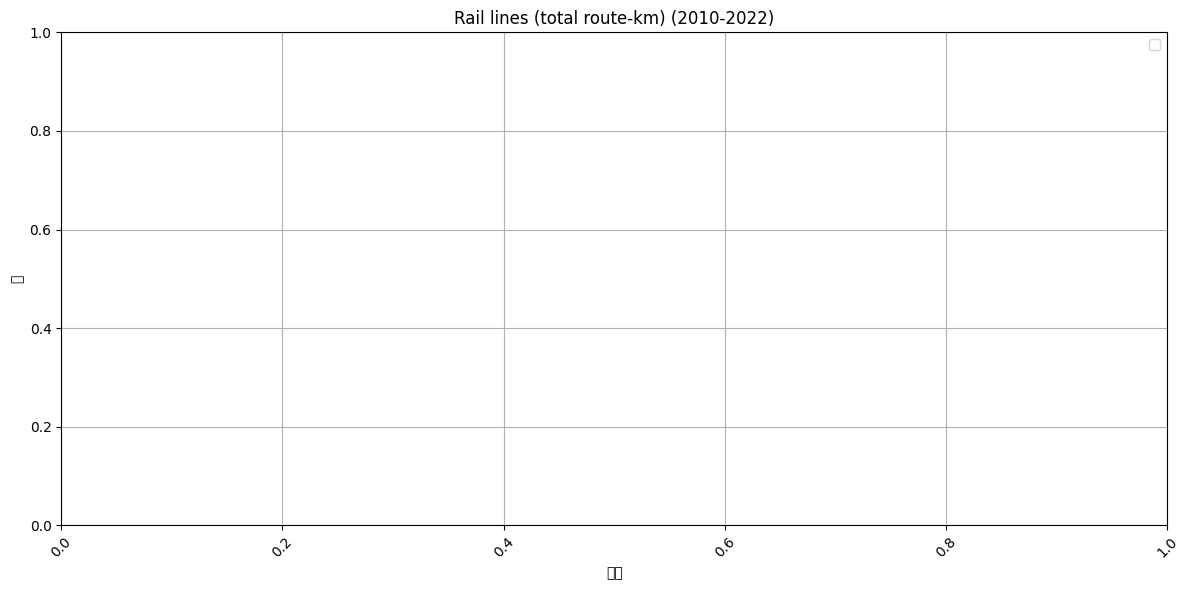

In [18]:
# import requests
# import pandas as pd
# import json

# def get_world_bank_data(country_codes, indicators, start_year=2010, end_year=2022):
#     """
#     월드뱅크 API에서 여러 국가와 지표에 대한 데이터를 가져오는 함수
    
#     Parameters:
#     -----------
#     country_codes : str or list
#         국가 코드 또는 코드 리스트 (예: 'KR' 또는 ['KR', 'US', 'JP'])
#     indicators : str or list
#         지표 코드 또는 코드 리스트 (예: 'NY.GDP.MKTP.CD' 또는 ['NY.GDP.MKTP.CD', 'SP.POP.TOTL'])
#     start_year : int
#         시작 연도
#     end_year : int
#         종료 연도
        
#     Returns:
#     --------
#     pandas.DataFrame
#         요청한 데이터가 담긴 데이터프레임
#     """
#     # 국가 코드와 지표를 문자열로 변환
#     if isinstance(country_codes, list):
#         country_codes = ';'.join(country_codes)
    
#     # 모든 지표에 대한 결과를 저장할 데이터프레임 리스트
#     all_data = []
    
#     # 지표가 리스트인 경우 각 지표별로 API 요청
#     if not isinstance(indicators, list):
#         indicators = [indicators]
    
#     for indicator in indicators:
#         # API URL 형식
#         url = f"http://api.worldbank.org/v2/country/{country_codes}/indicator/{indicator}"
        
#         # 파라미터 설정
#         params = {
#             'date': f"{start_year}:{end_year}",
#             'format': 'json',
#             'per_page': 1000
#         }
        
#         # API 요청
#         response = requests.get(url, params=params)
        
#         # 응답 확인
#         if response.status_code == 200:
#             data = response.json()
            
#             # 데이터가 없는 경우
#             if len(data) < 2 or not data[1]:
#                 print(f"지표 {indicator}에 대한 데이터가 없습니다.")
#                 continue
            
#             # 데이터 파싱
#             records = []
#             for entry in data[1]:
#                 if entry['value'] is not None:
#                     records.append({
#                         'country': entry['country']['value'],
#                         'country_code': entry['countryiso3code'],
#                         'year': entry['date'],
#                         'value': entry['value'],
#                         'indicator': entry['indicator']['value'],
#                         'indicator_code': indicator
#                     })
            
#             # 데이터프레임 생성 및 리스트에 추가
#             if records:
#                 df = pd.DataFrame(records)
#                 all_data.append(df)
#         else:
#             print(f"지표 {indicator}에 대한 API 요청 실패: {response.status_code}")
    
#     # 모든 데이터프레임 합치기
#     if all_data:
#         final_df = pd.concat(all_data, ignore_index=True)
#         return final_df
#     else:
#         print("가져온 데이터가 없습니다.")
#         return None

import requests
import pandas as pd
import json

def get_world_bank_data(country_codes, indicators, start_year=2010, end_year=2022):
    """
    월드뱅크 API에서 여러 국가와 지표에 대한 데이터를 가져오는 함수
    
    Parameters:
    -----------
    country_codes : str or list
        국가 코드 또는 코드 리스트 (예: 'KR' 또는 ['KR', 'US', 'JP'])
    indicators : str or list
        지표 코드 또는 코드 리스트 (예: 'NY.GDP.MKTP.CD' 또는 ['NY.GDP.MKTP.CD', 'SP.POP.TOTL'])
    start_year : int
        시작 연도
    end_year : int
        종료 연도
        
    Returns:
    --------
    pandas.DataFrame
        요청한 데이터가 담긴 데이터프레임
    """
    # 국가 코드와 지표를 문자열로 변환
    if isinstance(country_codes, list):
        country_codes = ';'.join(country_codes)
    
    # 모든 지표에 대한 결과를 저장할 데이터프레임 리스트
    all_data = []
    
    # 지표가 리스트인 경우 각 지표별로 API 요청
    if not isinstance(indicators, list):
        indicators = [indicators]
    
    # 지표 설명 사전 생성
    indicator_descriptions = {
        'IS.RRS.TOTL.KM': '철도 총 길이(km)',
        'EG.ELC.ACCS.ZS': '전기 접근성(%)',
        'LP.LPI.OVRL.XQ': '물류성과지수(LPI)',
        'SH.MED.BEDS.ZS': '병상 수(1,000명당)',
        'SH.H2O.SAFE.ZS': '안전한 식수 접근성(%)',
        'EG.FEC.RNEW.ZS': '재생에너지 소비 비율(%)',
        'SP.URB.TOTL.IN.ZS': '도시 인구 비율(%)'
    }
    
    # 지표별 단위 사전 생성
    indicator_units = {
        'IS.RRS.TOTL.KM': 'km',
        'EG.ELC.ACCS.ZS': '%',
        'LP.LPI.OVRL.XQ': '지수',
        'SH.MED.BEDS.ZS': '병상/1,000명',
        'SH.H2O.SAFE.ZS': '%',
        'EG.FEC.RNEW.ZS': '%',
        'SP.URB.TOTL.IN.ZS': '%'
    }
    
    for indicator in indicators:
        # API URL 형식
        url = f"http://api.worldbank.org/v2/country/{country_codes}/indicator/{indicator}"
        
        # 파라미터 설정
        params = {
            'date': f"{start_year}:{end_year}",
            'format': 'json',
            'per_page': 1000
        }
        
        # API 요청
        response = requests.get(url, params=params)
        
        # 응답 확인
        if response.status_code == 200:
            data = response.json()
            
            # 데이터가 없는 경우
            if len(data) < 2 or not data[1]:
                print(f"지표 {indicator}에 대한 데이터가 없습니다.")
                continue
            
            # 데이터 파싱
            records = []
            for entry in data[1]:
                if entry['value'] is not None:
                    records.append({
                        'country': entry['country']['value'],
                        'country_code': entry['countryiso3code'],
                        'year': entry['date'],
                        'value': entry['value'],
                        'indicator': entry['indicator']['value'],
                        'indicator_code': indicator,
                        'indicator_description': indicator_descriptions.get(indicator, '정보 없음'),
                        'unit': indicator_units.get(indicator, '정보 없음')
                    })
            
            # 데이터프레임 생성 및 리스트에 추가
            if records:
                df = pd.DataFrame(records)
                all_data.append(df)
        else:
            print(f"지표 {indicator}에 대한 API 요청 실패: {response.status_code}")
    
    # 모든 데이터프레임 합치기
    if all_data:
        final_df = pd.concat(all_data, ignore_index=True)
        return final_df
    else:
        print("가져온 데이터가 없습니다.")
        return None



# 사용 예시
if __name__ == "__main__":
    # 여러 국가의 여러 지표 데이터 가져오기
    # 한국, 미국, 일본의 GDP와 인구 데이터
    countries = ['KR']
    indicators = ['IS.RRS.TOTL.KM']

# , 'EG.ELC.ACCS.ZS', 'LP.LPI.OVRL.XQ', 'SH.MED.BEDS.ZS', 'SH.H2O.SAFE.ZS', 'EG.FEC.RNEW.ZS', 'SP.URB.TOTL.IN.ZS']
    
    data = get_world_bank_data(countries, indicators, 2010, 2022)
    
    if data is not None:
        print(f"총 {len(data)} 개의 데이터를 가져왔습니다.")
        print(data.head())
        
        # 국가별, 지표별로 데이터 분리하여 시각화
        import matplotlib.pyplot as plt
        import numpy as np
        
        # 지표별로 그래프 그리기
        for indicator in indicators:
            indicator_data = data[data['indicator_code'] == indicator]
            
            plt.figure(figsize=(12, 6))
            
            for country in countries:
                country_data = indicator_data[indicator_data['country_code'] == country]
                if not country_data.empty:
                    plt.plot(country_data['year'], country_data['value'], 
                             marker='o', label=country_data['country'].iloc[0])
            
            indicator_name = indicator_data['indicator'].iloc[0] if not indicator_data.empty else indicator
            plt.title(f'{indicator_name} (2010-2022)')
            plt.xlabel('연도')
            plt.ylabel('값')
            plt.grid(True)
            plt.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


In [19]:
df

,date,GDP 성장률,인플레이션,실업률,수출의 GDP 대비 비율
0,2022,2.612672,5.089514,2.857,48.271764
1,2021,4.304735,2.498333,3.639,41.877230
2,2020,-0.709415,0.537288,3.931,36.359591
3,2019,2.243978,0.383000,3.746,39.275861
4,2018,2.907404,1.475839,3.824,41.713291
5,2017,3.159636,1.944332,3.653,40.934207
6,2016,2.946882,0.971686,3.650,40.132651
7,2015,2.809103,0.706332,3.546,42.989562
8,2014,3.202454,1.274774,3.082,47.831421
9,2013,3.164709,1.301348,2.747,51.292071


In [15]:
df

,date,GDP 성장률,인플레이션,실업률,수출의 GDP 대비 비율
0,2022,2.612672,5.089514,2.857,48.271764
1,2021,4.304735,2.498333,3.639,41.877230
2,2020,-0.709415,0.537288,3.931,36.359591
3,2019,2.243978,0.383000,3.746,39.275861
4,2018,2.907404,1.475839,3.824,41.713291
5,2017,3.159636,1.944332,3.653,40.934207
6,2016,2.946882,0.971686,3.650,40.132651
7,2015,2.809103,0.706332,3.546,42.989562
8,2014,3.202454,1.274774,3.082,47.831421
9,2013,3.164709,1.301348,2.747,51.292071
